In [7]:
from model_utils import *
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    validation_curve,
)
from sklearn import preprocessing
# import scikitplot as skplt

## Import Data
### Data used for preliminary results are downsampled and balanced

In [5]:
# import dataset
test_data = "dataset/test.csv"
df_test = pd.read_csv(test_data, sep=",", index_col="ID_code")

train_data = "dataset/train.csv"
df_train = pd.read_csv(train_data, sep=",", index_col="ID_code")

# Separate majority and minority classes
df2_majority = df_train[df_train["target"] == 0]
df2_minority = df_train[df_train["target"] == 1]
n_samples = df2_minority.target.sum()

df2_majority_downsampled = resample(
   df2_majority, replace=False, n_samples=n_samples, random_state=99
)
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])
X_dn = df_downsampled.drop(["target"], axis=1)
y_dn = df_downsampled["target"]

# calculatig the z-score normalization using sklearn
std_scale = preprocessing.StandardScaler().fit(df_train.drop(["target"], axis=1).values)
X_dn_norm = std_scale.transform(X_dn)

#use all downsamples samples (40 000)
X_train, X_test, y_train, y_test = train_test_split(X_dn_norm, y_dn, test_size=0.2, random_state=101)

#reduce size of for cbomputationally intensive algorithms
X_trainsmall, _, y_trainsmall, _ = train_test_split(X_train, y_train, test_size=0.8756096, random_state=101)

## Create Models using default Parameters

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_params = {
    'C': 0.00010494583820459354, 
    'solver': 'saga'
}
clf_logreg = LogisticRegression(random_state=111, penalty='l2', **logreg_params)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB_params = {
    'var_smoothing': 7.453943540948982e-11
}
clf_NB = GaussianNB(**NB_params)

In [ ]:
# XGBoost
import xgboost as xgb

xgb_params = {
    'colsample_bylevel': 0.01, 
    'colsample_bytree': 1.0,
    'gamma': 0.49999999999999994,
    'max_delta_step': 0,
    'max_depth': 8,
    'min_child_weight': 19,
    'reg_alpha': 1.0,
    'reg_lambda': 1000.0,
    'scale_pos_weight': 0.3237122916966163,
    'subsample': 1.0,
}

clf_xgb = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        learning_rate=0.1,
        silent=1,
        early_stopping=200,
        n_estimators=8000,
        tree_method="approx",
        n_jobs=-1
        **xgb_params,
    )


In [14]:
# LightGBM
import lightgbm as lgb

# lgb_params = {
#     'colsample_bylevel': 0.5447321073292221,
#     'colsample_bytree': 0.689559548843798,
#     'gamma': 0.01,
#     'max_bin': 426,
#     'max_delta_step': 13,
#     'max_depth': 12,
#     'min_child_samples': 22,
#     'min_child_weight': 20,
#     'reg_alpha': 0.7966900476208586,
#     'reg_lambda': 0.05905416598434505,
#     'scale_pos_weight': 0.23497655517415514,
#     'subsample': 0.9183687205758093,
#     'subsample_for_bin': 492045,
#     'subsample_freq': 3,
# }

lgb_params = {
        'num_leaves': 10,
        'max_bin': 119,
        'min_data_in_leaf': 11,
        'learning_rate': 0.02,
        'min_sum_hessian_in_leaf': 0.00245,
        'bagging_fraction': 1.0, 
        'bagging_freq': 5, 
        'feature_fraction': 0.05,
        'lambda_l1': 4.972,
        'lambda_l2': 2.276,
        'min_gain_to_split': 0.65,
        'max_depth': 14,
        'save_binary': True,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
    }

clf_lgb = lgb.LGBMClassifier(
        n_jobs=-1,
        **lgb_params,
    )


## Train and Benchmark All Models

### Logistic Regression

In [ ]:
# Benchmark Logistic Regression

model_logreg = clf_logreg.fit(X_train, y_train)

In [ ]:
stats_fig, report = benchmark_model_performance(model_logreg, X_test, y_test)
stats_fig.savefig(os.path.join('experiment1-logisticregression.png'), dpi=300, format='png')
stats_fig.show()

### Naive Bayes

In [ ]:
# Benchmark Logistic Regression

model_NB = clf_NB.fit(X_train, y_train)

In [ ]:
stats_fig, report = benchmark_model_performance(model_NB, X_test, y_test)
stats_fig.savefig(os.path.join('experiment1-naivebayes.png'), dpi=300, format='png')
stats_fig.show()

### XGBoost

In [ ]:
# Benchmark Logistic Regression

model_xgb = clf_NB.fit(X_train, y_train)

In [ ]:
stats_fig, report = benchmark_model_performance(model_xgb, X_test, y_test)
stats_fig.savefig(os.path.join('experiment1-xgb.png'), dpi=300, format='png')
stats_fig.show()

### Light GBM

In [15]:
# Benchmark Logistic Regression

model_lgb = clf_lgb.fit(X_train, y_train)

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


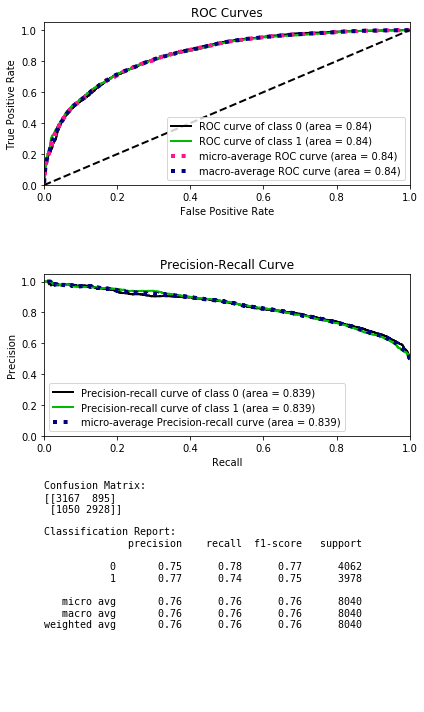

In [17]:
stats_fig, report = benchmark_model_performance(model_lgb, X_test, y_test)
stats_fig.savefig(os.path.join('experiment2-lgb.png'), dpi=300, format='png')
stats_fig.show()